Рассмотрим основные моменты не вошедшие в предыдущие лекции

Обновим и подключим библиотеки:

In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

Requirement already up-to-date: pip in c:\users\xiaomi\appdata\local\programs\python\python36\lib\site-packages (20.1.1)
Requirement already up-to-date: scikit-learn==0.23.0 in c:\users\xiaomi\appdata\local\programs\python\python36\lib\site-packages (0.23.0)


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет MNIST.

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Using TensorFlow backend.


Объем тренировочного набора данных:

In [4]:
len(X_train)

60000

Посмотрим, что из себя представляет, например, нулевой объект.

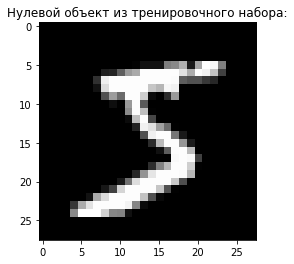

In [5]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [6]:
y_train[0]

5

### Рассмотрим пример для демонстрации алгоритма One-vs-All

Для начала преобразуем данные в привычный формат.

In [7]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_pred.reshape(len(X_pred), dim)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=784, svd_solver='full')
X_full = pca.fit(X_train).transform(X_train)

In [12]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance


array([0.097, 0.168, 0.23 , 0.284, 0.332, 0.375, 0.408, 0.437, 0.465,
       0.488, 0.509, 0.529, 0.547, 0.564, 0.579, 0.594, 0.607, 0.62 ,
       0.632, 0.644, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731, 0.737, 0.744, 0.75 , 0.755, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811, 0.815, 0.818, 0.821, 0.825, 0.828, 0.831, 0.834, 0.837,
       0.84 , 0.842, 0.845, 0.848, 0.85 , 0.853, 0.855, 0.857, 0.86 ,
       0.862, 0.864, 0.866, 0.868, 0.87 , 0.872, 0.874, 0.876, 0.878,
       0.879, 0.881, 0.883, 0.884, 0.886, 0.888, 0.889, 0.891, 0.892,
       0.893, 0.895, 0.896, 0.897, 0.899, 0.9  , 0.901, 0.903, 0.904,
       0.905, 0.906, 0.907, 0.908, 0.909, 0.911, 0.912, 0.913, 0.914,
       0.915, 0.916, 0.917, 0.918, 0.918, 0.919, 0.92 , 0.921, 0.922,
       0.923, 0.924, 0.924, 0.925, 0.926, 0.927, 0.928, 0.928, 0.929,
       0.93 , 0.93 , 0.931, 0.932, 0.933, 0.933, 0.934, 0.935, 0.935,
       0.936, 0.936,

In [11]:
pca = PCA(n_components=41, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X_train).transform(X_train) #X_transformed -- ndarray объектов, где каждый объект описывается 41 ГК

In [12]:
#Для разделения данных рекомендуем использовать функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_train, test_size=0.3, random_state=28)

In [15]:
import pandas as pd
df = pd.DataFrame(X_train)
df[0].mean()

4.3329420813341875

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

Обучаем модель:

In [17]:
forest = RandomForestClassifier(n_estimators=10, #количество деревьев
                             criterion='gini', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_depth=20, #максимальное число листьев
                              random_state=28)
clf_f = OneVsRestClassifier(forest).fit(X_train, y_train)

In [18]:
y_pred_f = clf_f.predict(X_test)

Выполняем оценку:

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_f)

array([[1651,    0,   14,    1,    6,   16,   17,    2,    6,    1],
       [   0, 1994,    6,    6,    2,    8,    4,    5,    6,    5],
       [  20,   13, 1588,   21,   22,   10,   14,   23,   49,   10],
       [   3,    9,   43, 1655,    7,   56,   17,   10,   43,   16],
       [   6,   11,   14,    2, 1630,    7,   19,    8,   16,   61],
       [  21,    5,    8,   64,   16, 1478,   33,    5,   31,   15],
       [  12,    1,   17,    4,    5,   15, 1722,    1,    6,    0],
       [   7,   21,   18,    2,   25,    6,    1, 1756,   10,   47],
       [  20,   18,   22,   69,   13,   54,   10,    7, 1437,   26],
       [  12,   11,    6,   28,   53,   18,    8,   45,   17, 1621]])

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=28)
clf_lr = OneVsRestClassifier(lr).fit(X_train, y_train)

In [21]:
y_pred_lr = clf_lr.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lr)

array([[1651,    0,   12,    1,    4,   13,   13,    4,   12,    4],
       [   0, 1970,    9,    4,    2,   12,    3,    5,   26,    5],
       [  14,   22, 1507,   25,   44,    6,   32,   40,   60,   20],
       [  14,   10,   56, 1580,    0,   94,   14,   21,   40,   30],
       [   7,   13,   11,    2, 1614,    7,    9,    4,   21,   86],
       [  29,   10,   13,   83,   41, 1332,   50,   11,   66,   41],
       [  11,    3,   25,    2,   19,   20, 1694,    3,    5,    1],
       [   5,   14,   25,    9,   35,    9,    2, 1725,    6,   63],
       [  17,   49,   29,   74,    9,   71,   19,   11, 1358,   39],
       [   5,   15,   11,   34,   75,   23,    1,   75,   25, 1555]])

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_depth=20, #максимальное число листьев
                              random_state=28)
clf_t = OneVsRestClassifier(tree).fit(X_train, y_train)

In [24]:
y_pred_t = clf_t.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_t)

array([[1527,    5,   35,   14,    9,   59,   29,    2,   25,    9],
       [   0, 1974,   10,   13,    3,    9,    4,    8,   12,    3],
       [  22,   20, 1458,   60,   22,   30,   25,   29,   78,   26],
       [  12,   16,   75, 1511,   10,   79,   23,   17,   87,   29],
       [   9,   12,   49,    6, 1444,   41,   35,   17,   31,  130],
       [  14,   12,   78,   86,   27, 1291,   39,   23,   64,   42],
       [  19,   10,   36,   13,   12,   33, 1616,    4,   29,   11],
       [   9,   13,   34,   10,   24,   15,    9, 1682,   20,   77],
       [  22,   20,   92,   92,   24,   71,   17,   14, 1288,   36],
       [  12,   11,   57,   21,   89,   26,    7,   84,   48, 1464]])

In [26]:
import pandas as pd 
Data = pd.read_csv('pred_for_task.csv')

In [27]:
Data

,FileName,Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783
0,file1,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,file2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,file3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,file4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,file5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,file6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,file7,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,file8,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,file9,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,file10,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = pd.DataFrame(Data.drop(['FileName','Label'], axis=1))
y = pd.DataFrame(Data['Label'])

In [33]:
pca_test = PCA(n_components=41, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed_test = pca_test.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается 41 ГК